<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/josh_alexis_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [36]:
df <- read_csv("books.csv") %>% filter(!(ratings_count == 0 & average_rating != 0)) %>%
   mutate(is_english = if_else(language_code %in% c("eng", "en-US", "en-GB", "en-CA"),
                              "English",
                              "Not English")) %>% select(-...13)

New names:
• `` -> `...13`
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 11127 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): title, authors, isbn, language_code, publication_date, publisher
dbl (6): bookID, average_rating, isbn13, num_pages, ratings_count, text_revi...
lgl (1): ...13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [37]:
df %>% head

bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,is_english
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling/Mary GrandPré,4.57,439785960,9.78e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,English
2,Harry Potter and the Order of the Phoenix (Harry Potter #5),J.K. Rowling/Mary GrandPré,4.49,439358078,9.78e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,English
4,Harry Potter and the Chamber of Secrets (Harry Potter #2),J.K. Rowling,4.42,439554896,9.78e+12,eng,352,6333,244,11/1/2003,Scholastic,English
5,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,English
8,Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),J.K. Rowling/Mary GrandPré,4.78,439682584,9.78e+12,eng,2690,41428,164,9/13/2004,Scholastic,English
9,"Unauthorized Harry Potter Book Seven News: ""Half-Blood Prince"" Analysis and Speculation",W. Frederick Zimmerman,3.74,976540606,9.78e+12,en-US,152,19,1,4/26/2005,Nimble Books,English


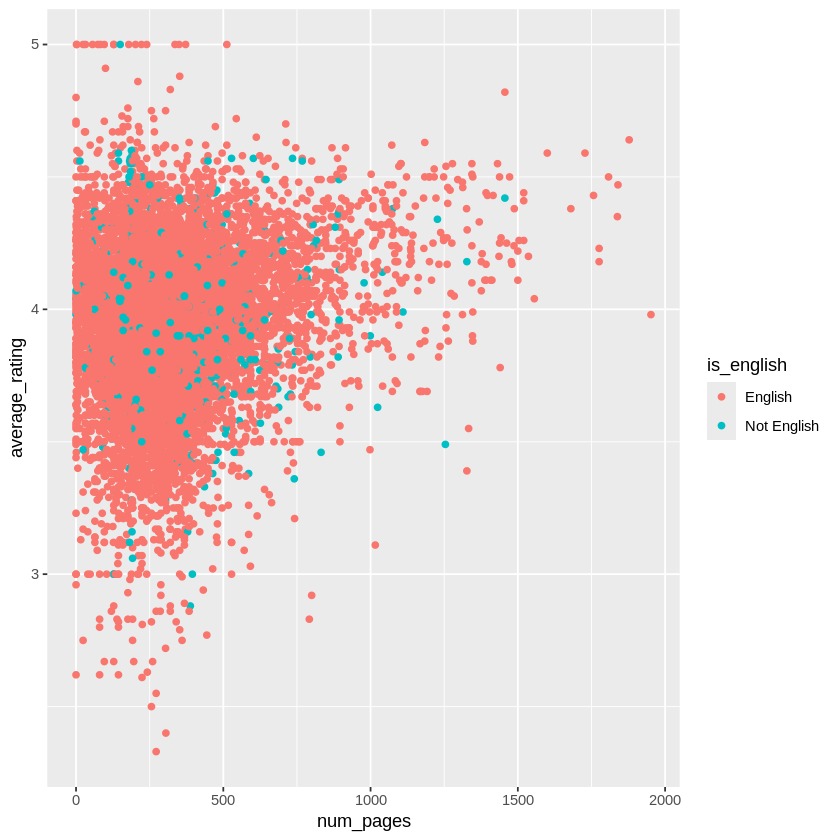

In [38]:
df %>% filter(average_rating > 2 & num_pages < 2000) %>% ggplot(aes(x=num_pages, y=average_rating, color=is_english)) + geom_point()

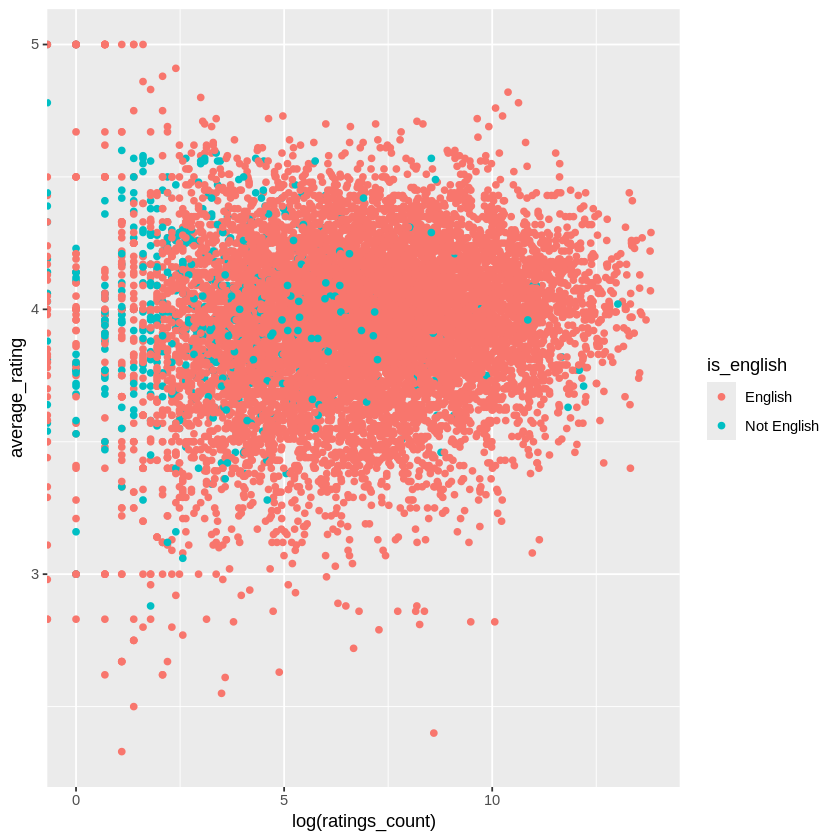

In [34]:
df %>% filter(ratings_count < 1000000 & average_rating > 2) %>% ggplot(aes(x=log(ratings_count), y=average_rating, color=is_english)) + geom_point()

In [28]:
df %>% filter(average_rating > 2) %>% dim

[1] 11089    13

In [39]:
model1 <- lm(average_rating ~ num_pages,data=df)
summary(model1)


Call:
lm(formula = average_rating ~ num_pages, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0447 -0.1570  0.0227  0.1978  1.1405 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.859e+00  5.635e-03  684.79   <2e-16 ***
num_pages   2.237e-04  1.362e-05   16.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3451 on 11066 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.02382,	Adjusted R-squared:  0.02373 
F-statistic:   270 on 1 and 11066 DF,  p-value: < 2.2e-16


In [40]:
model2 <- lm(average_rating ~ num_pages + ratings_count ,data=df)
summary(model2)


Call:
lm(formula = average_rating ~ num_pages + ratings_count, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0421 -0.1566  0.0212  0.1968  1.1418 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.858e+00  5.644e-03 683.463  < 2e-16 ***
num_pages     2.221e-04  1.362e-05  16.308  < 2e-16 ***
ratings_count 1.024e-07  2.909e-08   3.521 0.000431 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3449 on 11065 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.02491,	Adjusted R-squared:  0.02473 
F-statistic: 141.3 on 2 and 11065 DF,  p-value: < 2.2e-16


In [41]:
model3 <- lm(average_rating ~ num_pages + ratings_count + text_reviews_count ,data=df)
summary(model3)


Call:
lm(formula = average_rating ~ num_pages + ratings_count + text_reviews_count, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0421 -0.1566  0.0211  0.1969  1.1418 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.858e+00  5.659e-03 681.655   <2e-16 ***
num_pages           2.221e-04  1.362e-05  16.308   <2e-16 ***
ratings_count       1.088e-07  5.814e-08   1.871   0.0614 .  
text_reviews_count -3.200e-07  2.539e-06  -0.126   0.8997    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3449 on 11064 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.02491,	Adjusted R-squared:  0.02464 
F-statistic: 94.21 on 3 and 11064 DF,  p-value: < 2.2e-16


In [49]:
df_clean <- df %>%
  filter(!is.na(ratings_count), ratings_count > 0,   # remove NA or 0 before taking log
         !is.na(num_pages),
         !is.na(text_reviews_count),
         !is.na(is_english),
         !is.na(average_rating))

In [54]:
model4 <- lm(average_rating ~ num_pages + ratings_count + text_reviews_count + is_english,data=df)
summary(model4)


Call:
lm(formula = average_rating ~ num_pages + ratings_count + text_reviews_count + 
    is_english, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0393 -0.1568  0.0218  0.1964  1.1439 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.856e+00  5.701e-03 676.270  < 2e-16 ***
num_pages              2.213e-04  1.362e-05  16.250  < 2e-16 ***
ratings_count          1.065e-07  5.812e-08   1.831  0.06706 .  
text_reviews_count    -5.751e-08  2.539e-06  -0.023  0.98193    
is_englishNot English  4.533e-02  1.484e-02   3.056  0.00225 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3448 on 11063 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.02573,	Adjusted R-squared:  0.02538 
F-statistic: 73.05 on 4 and 11063 DF,  p-value: < 2.2e-16


In [55]:
model5 <- lm(average_rating ~ num_pages + log(ratings_count) + text_reviews_count + is_english,data=df_clean)
summary(model5)


Call:
lm(formula = average_rating ~ num_pages + log(ratings_count) + 
    text_reviews_count + is_english, data = df_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.84002 -0.16608  0.01148  0.18466  1.18526 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.807e+00  8.533e-03 446.166  < 2e-16 ***
num_pages              1.916e-04  1.155e-05  16.589  < 2e-16 ***
log(ratings_count)     1.023e-02  1.156e-03   8.851  < 2e-16 ***
text_reviews_count    -6.956e-07  1.160e-06  -0.599    0.549    
is_englishNot English  7.852e-02  1.286e-02   6.104 1.07e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2896 on 11038 degrees of freedom
Multiple R-squared:  0.03764,	Adjusted R-squared:  0.03729 
F-statistic: 107.9 on 4 and 11038 DF,  p-value: < 2.2e-16


In [61]:
model6 <- lm(average_rating ~ num_pages*is_english + log(ratings_count) + text_reviews_count,data=df_clean)
summary(model6)


Call:
lm(formula = average_rating ~ num_pages * is_english + log(ratings_count) + 
    text_reviews_count, data = df_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.83813 -0.16623  0.01128  0.18510  1.18847 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      3.804e+00  8.561e-03 444.335  < 2e-16 ***
num_pages                        2.015e-04  1.178e-05  17.107  < 2e-16 ***
is_englishNot English            1.646e-01  2.419e-02   6.802 1.08e-11 ***
log(ratings_count)               1.021e-02  1.155e-03   8.844  < 2e-16 ***
text_reviews_count              -7.160e-07  1.160e-06  -0.617    0.537    
num_pages:is_englishNot English -2.426e-04  5.778e-05  -4.198 2.71e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2894 on 11037 degrees of freedom
Multiple R-squared:  0.03918,	Adjusted R-squared:  0.03874 
F-statistic:    90 on 5 and 11037 DF,  p-va

In [45]:
install.packages("stargazer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [63]:
# Load the stargazer package
library(stargazer)

# Display the models in a single summary table
stargazer(model1, model2, model3, model4, model5, model6,
          type = "text",         # Use "html" or "latex" for publication
          title = "Regression Results",
          column.labels = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5", "Model6"),
          dep.var.caption = "Dependent Variable: Average Rating",
          align = TRUE,
          no.space = TRUE)


Regression Results
                                                                                              Dependent Variable: Average Rating                                                              
                                --------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                        average_rating                                                                        
                                         Model 1                    Model 2                    Model 3                   Model 4                   Model 5                    Model6          
                                           (1)                        (2)                        (3)                       (4)                       (5)                        (6)           
-------------------------

In [64]:
# Display the models in a single summary table
stargazer(model1, model2, model3, model4, model5, model6,
          type = "latex",         # Use "html" or "latex" for publication
          title = "Regression Results",
          column.labels = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5", "Model6"),
          dep.var.caption = "Dependent Variable: Average Rating",
          align = TRUE,
          no.space = TRUE)


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Fri, Apr 04, 2025 - 02:47:30 PM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{Regression Results} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lD{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{6}{c}{Dependent Variable: Average Rating} \\ 
\cline{2-7} 
\\[-1.8ex] & \multicolumn{6}{c}{average\_rating} \\ 
 & \multicolumn{1}{c}{Model 1} & \multicolumn{1}{c}{Model 2} & \multicolumn{1}{c}{Model 3} & \multicolumn{1}{c}{Model 4} & \multicolumn{1}{c}{Model 5} & \multicolumn{1}{c}{Model6} \\ 
\\[-1.8ex] & \multicolumn{1}{c}{(1)} & \multicolumn{1}{c}{(2)} & \multicolumn{1}{c}{(3)} & \multicolumn{1}{c}{(4)} & \multicolumn{1}{c}{(5)} & \multicolumn{1}{c}{(6)}\\ 
\hline \\[-1.8ex] 
 num\_pages & 0.0002^{***} & 0.0002^{***} & 0.0002^{***} & 0.0002^{***} & 